# Import All Necessary Libraries 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data manipulation and analysis
import os # operating system functions
import matplotlib.pyplot as plt # plotting and charting
import seaborn as sns # data visualization

# Display plots and charts within the Jupyter Notebook
%matplotlib inline

# Machine learning libraries
from tensorflow import keras # high-level API for building and training models
from sklearn.metrics import classification_report, confusion_matrix # evaluation metrics
from sklearn.preprocessing import MinMaxScaler # data preprocessing
from sklearn.model_selection import train_test_split # train/test split
from imblearn.over_sampling import SMOTE # resampling for imbalanced data


In [2]:
#pip install imblearn

# Get the data

In [3]:
# Load the Airbnb CSV file into a Pandas dataframe
df = pd.read_csv('/Users/kanso/OneDrive/Desktop/Maths & Prog for AI/Task3/data.csv')
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


# Understanding the Data

In [78]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [79]:
df.shape

(6819, 96)

In [80]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [81]:
#check for null values
df.isna().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

<Figure size 1000x1400 with 0 Axes>

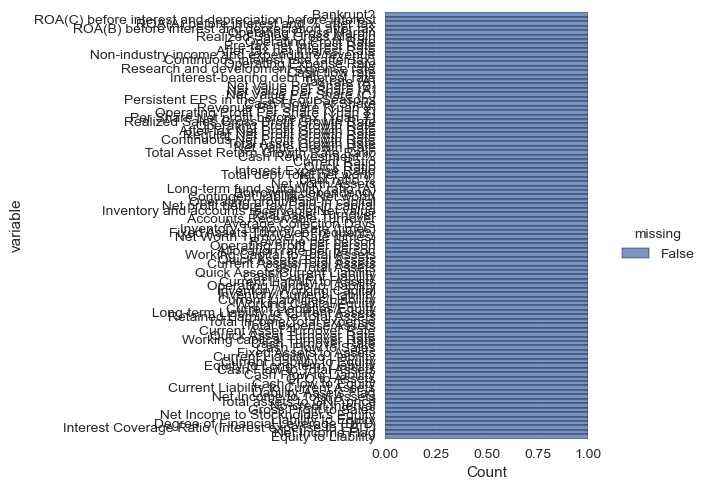

In [82]:
plt.figure(figsize=(10,14))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

The plot above displays a bar for each variable in the DataFrame, with the height of the bar representing the percentage of missing values for that variable. The bar will be coloured based on whether or not the value is missing (blue for present, orange for missing). As we can see we have no missing values.

## Columns for feature Scaling

In [83]:
cols_for_scale = df.max()[df.max()>1]
cols_for_scale

 Operating Expense Rate                   9.990000e+09
 Research and development expense rate    9.980000e+09
 Interest-bearing debt interest rate      9.900000e+08
 Revenue Per Share (Yuan ¥)               3.020000e+09
 Total Asset Growth Rate                  9.990000e+09
 Net Value Growth Rate                    9.330000e+09
 Current Ratio                            2.750000e+09
 Quick Ratio                              9.230000e+09
 Total debt/Total net worth               9.940000e+09
 Accounts Receivable Turnover             9.740000e+09
 Average Collection Days                  9.730000e+09
 Inventory Turnover Rate (times)          9.990000e+09
 Fixed Assets Turnover Frequency          9.990000e+09
 Revenue per person                       8.810000e+09
 Allocation rate per person               9.570000e+09
 Quick Assets/Current Liability           8.820000e+09
 Cash/Current Liability                   9.650000e+09
 Inventory/Current Liability              9.910000e+09
 Long-term

In [84]:
df.min()[df.min()<0]

Series([], dtype: float64)

In [108]:
# Initialize a MinMaxScaler object
scale = MinMaxScaler()

# Fit the scaler to the data and transform it
scalled = scale.fit_transform(df[cols_for_scale.keys()])

# Iterate over the columns in cols_for_scale and replace the values in df with the scaled values
i = 0
for column in cols_for_scale.keys():
    df[column] = scalled[:,i]
    i += 1

# Print summary statistics for the scaled columns
df[cols_for_scale.keys()].describe()


,Operating Expense Rate,Research and development expense rate,Interest-bearing debt interest rate,Revenue Per Share (Yuan ¥),Total Asset Growth Rate,Net Value Growth Rate,Current Ratio,Quick Ratio,Total debt/Total net worth,Accounts Receivable Turnover,...,Allocation rate per person,Quick Assets/Current Liability,Cash/Current Liability,Inventory/Current Liability,Long-term Liability to Current Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Total assets to GNP price
count,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,...,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03
mean,1.997345e-01,1.954336e-01,1.661415e-02,4.399472e-04,0.551361,1.678684e-04,1.466491e-04,9.075401e-04,4.442995e-04,1.313111e-03,...,1.176153e-03,4.073585e-04,3.850777e-03,5.631363e-03,5.677153e-03,1.195856e-01,2.163735e-01,2.471977e-01,1.466491e-04,1.897089e-03
std,3.240925e-01,2.603499e-01,1.093687e-01,1.712155e-02,0.290062,1.223573e-02,1.210987e-02,2.650972e-02,1.694234e-02,2.856877e-02,...,3.077391e-02,1.945815e-02,5.288610e-02,5.873376e-02,5.977679e-02,2.821161e-01,3.374944e-01,2.938623e-01,1.210987e-02,3.833504e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.568443e-14,1.284448e-14,2.050710e-13,5.175954e-12,0.486486,4.726355e-14,2.747290e-12,5.120155e-13,3.025200e-13,7.290899e-14,...,4.305673e-13,5.940789e-13,2.044567e-13,3.191875e-13,0.000000e+00,1.456236e-14,1.417149e-14,2.735337e-14,1.025966e-11,9.201838e-14
50%,2.780369e-14,5.100200e-02,3.242749e-13,9.064806e-12,0.640641,4.951292e-14,3.849882e-12,8.030847e-13,5.579763e-13,9.936454e-14,...,8.196837e-13,8.967005e-13,5.081748e-13,6.556342e-13,2.069831e-13,1.987816e-14,2.247728e-14,1.080000e-01,2.366359e-11,2.123435e-13
75%,4.149149e-01,3.456914e-01,5.379326e-13,1.535007e-11,0.739740,5.352220e-14,5.916192e-12,1.327097e-12,9.329268e-13,1.493593e-13,...,1.569520e-12,1.468357e-12,1.327002e-12,1.124800e-12,9.440195e-13,4.525945e-14,4.900000e-01,4.510000e-01,4.473557e-11,5.366372e-13
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


This code initialises a MinMaxScaler object and uses it to scale the data in the specified columns of the data frame df. The scaled data is then used to update the corresponding columns in the data frame, and the summary statistics for the scaled columns are displayed using the describe method. Scaling the data can be helpful to ensure that all features are on a similar scale, which can be important when training machine learning models. The MinMaxScaler scales the data by transforming the values to the range 0 to 1, with 0 corresponding to the minimum value in the original data and 1 corresponding to the maximum value. This can help the model converge faster and improve its performance.

Text(0.5, 1.0, 'Target feature - Bankrupt?')

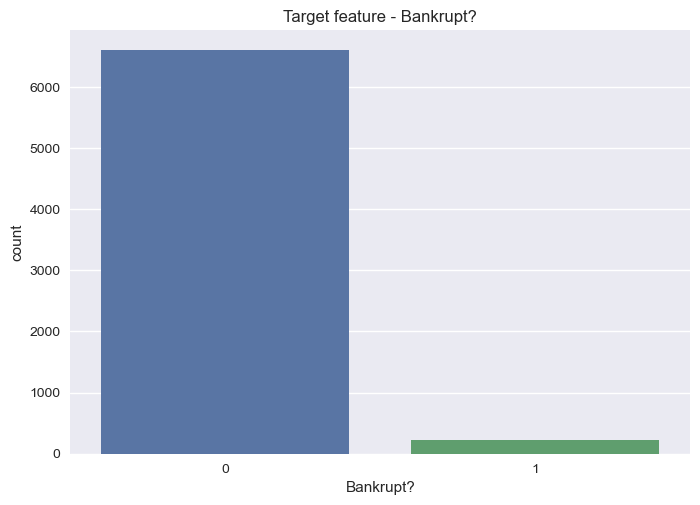

In [86]:
sns.countplot(x=df['Bankrupt?'])
plt.title('Target feature - Bankrupt?')

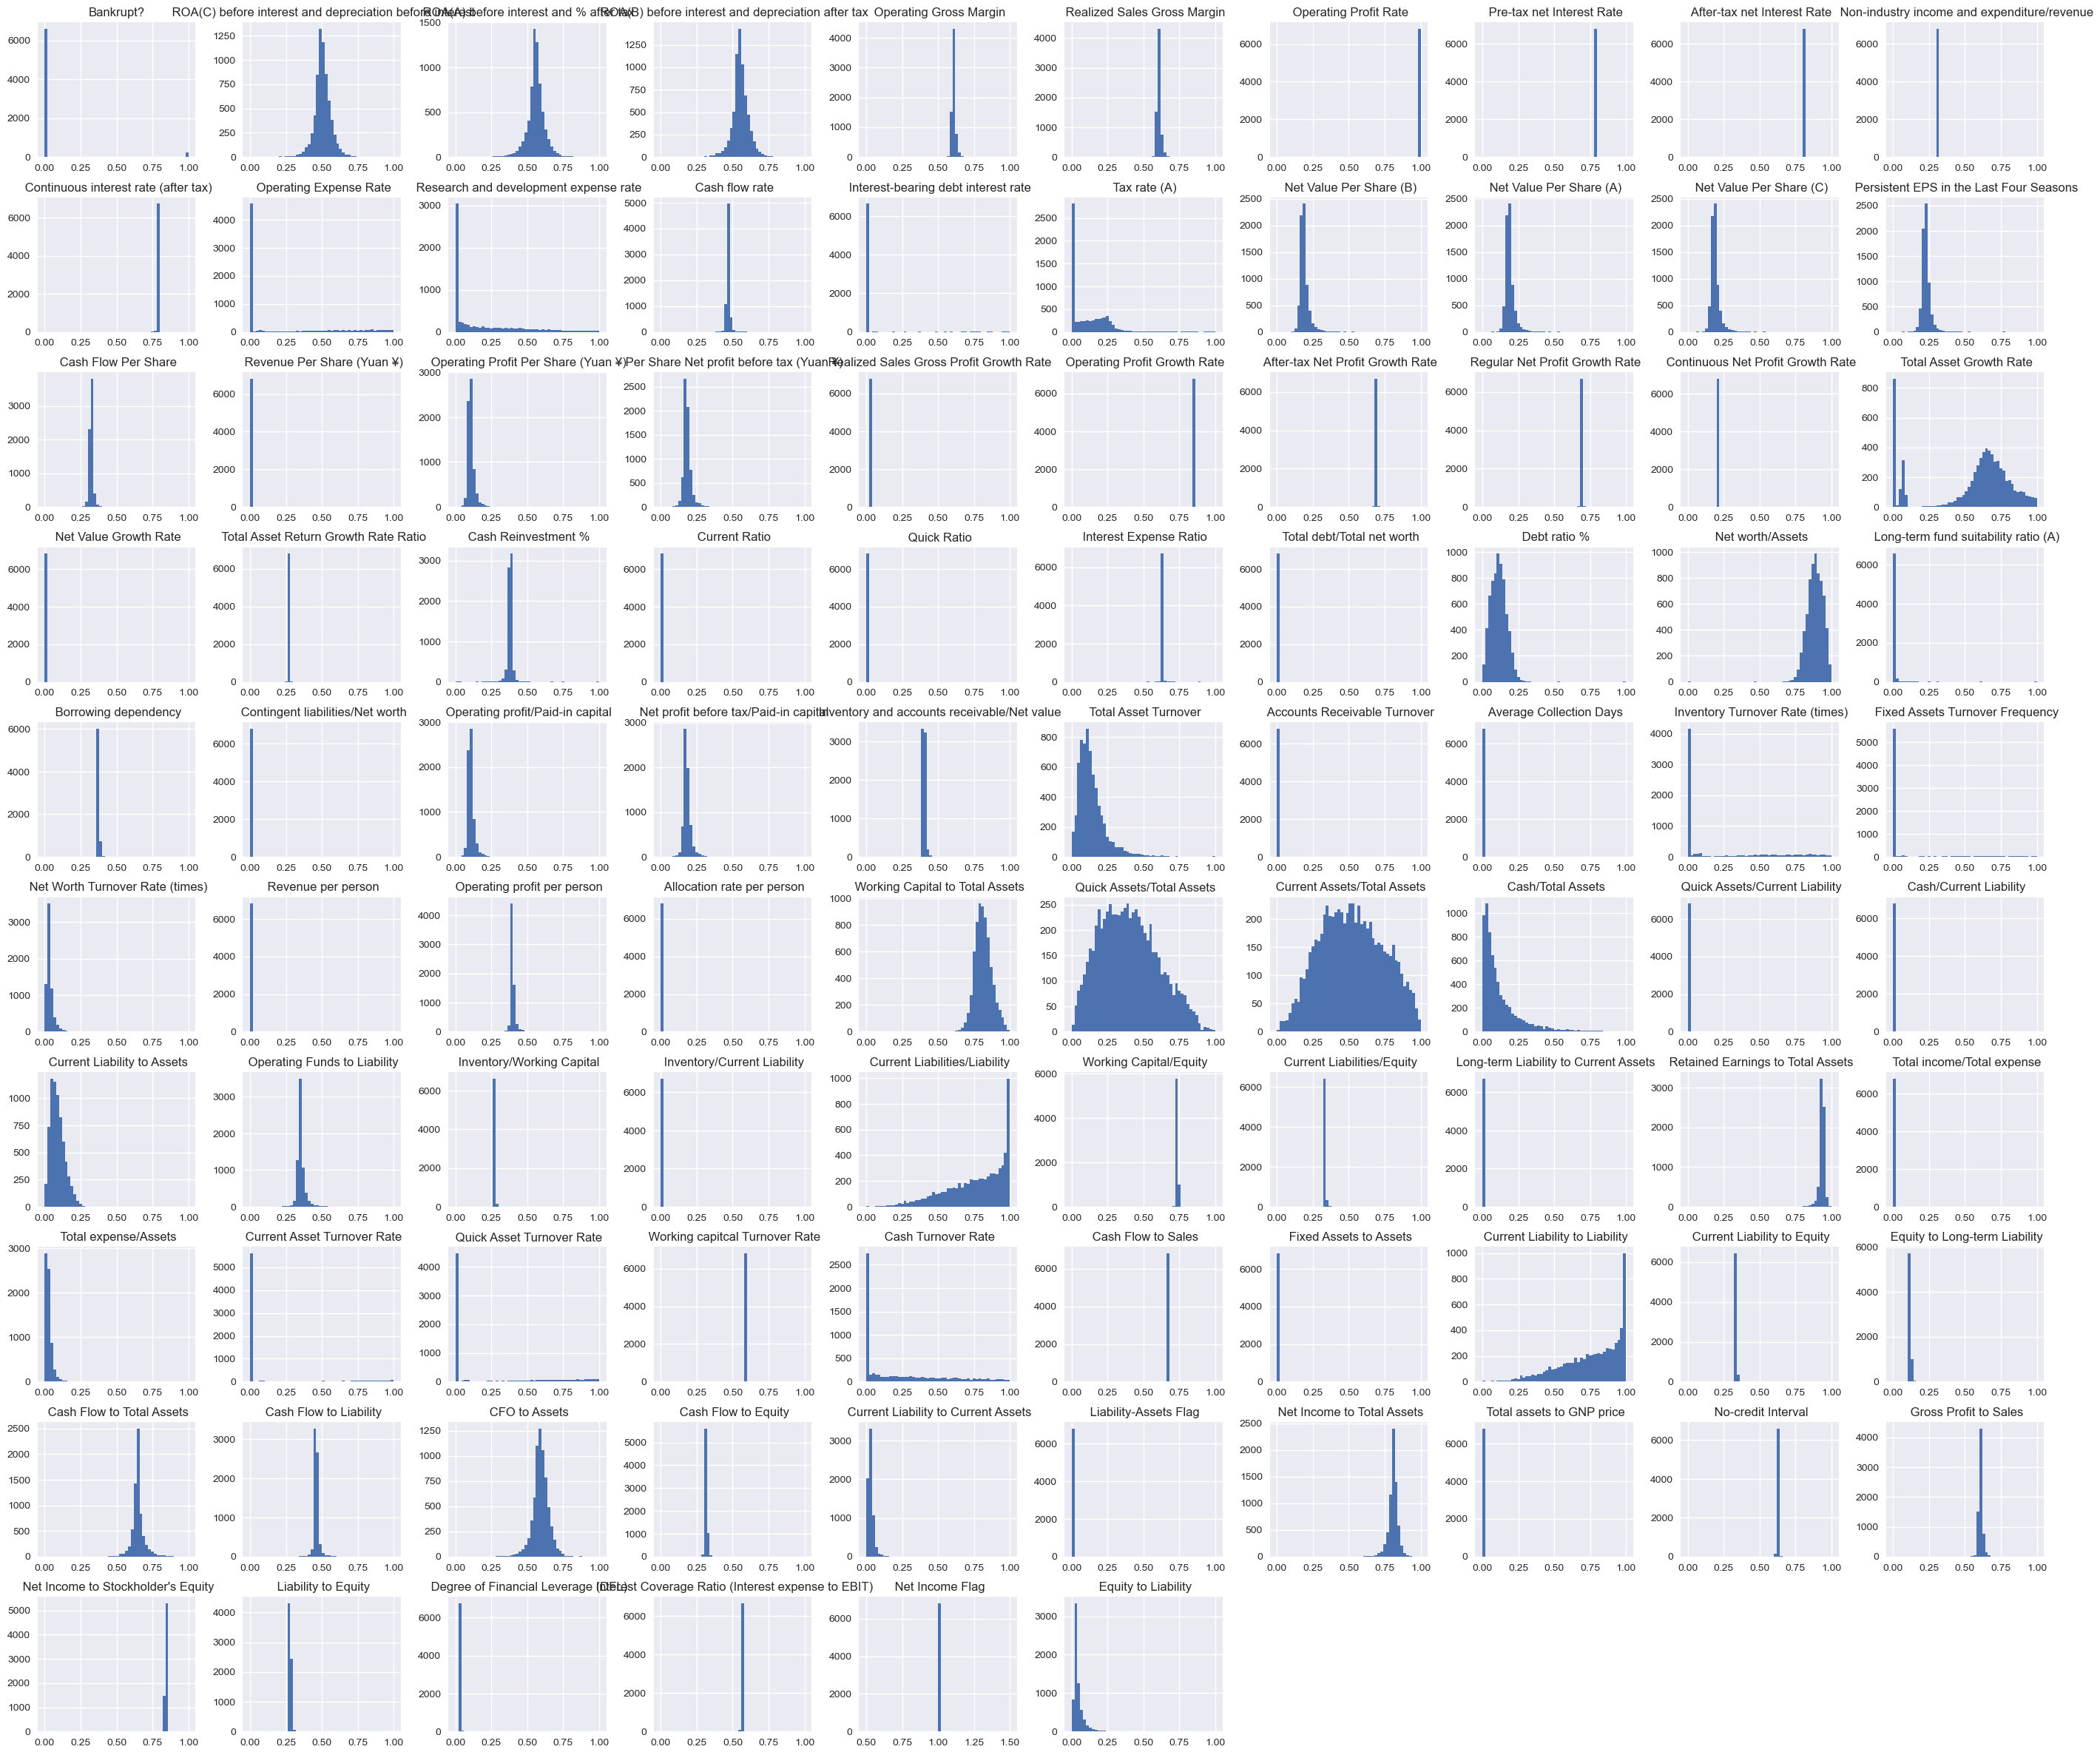

In [87]:
# Looking at the histograms of numerical data
df.hist(figsize = (35,30), bins = 50)
plt.show()

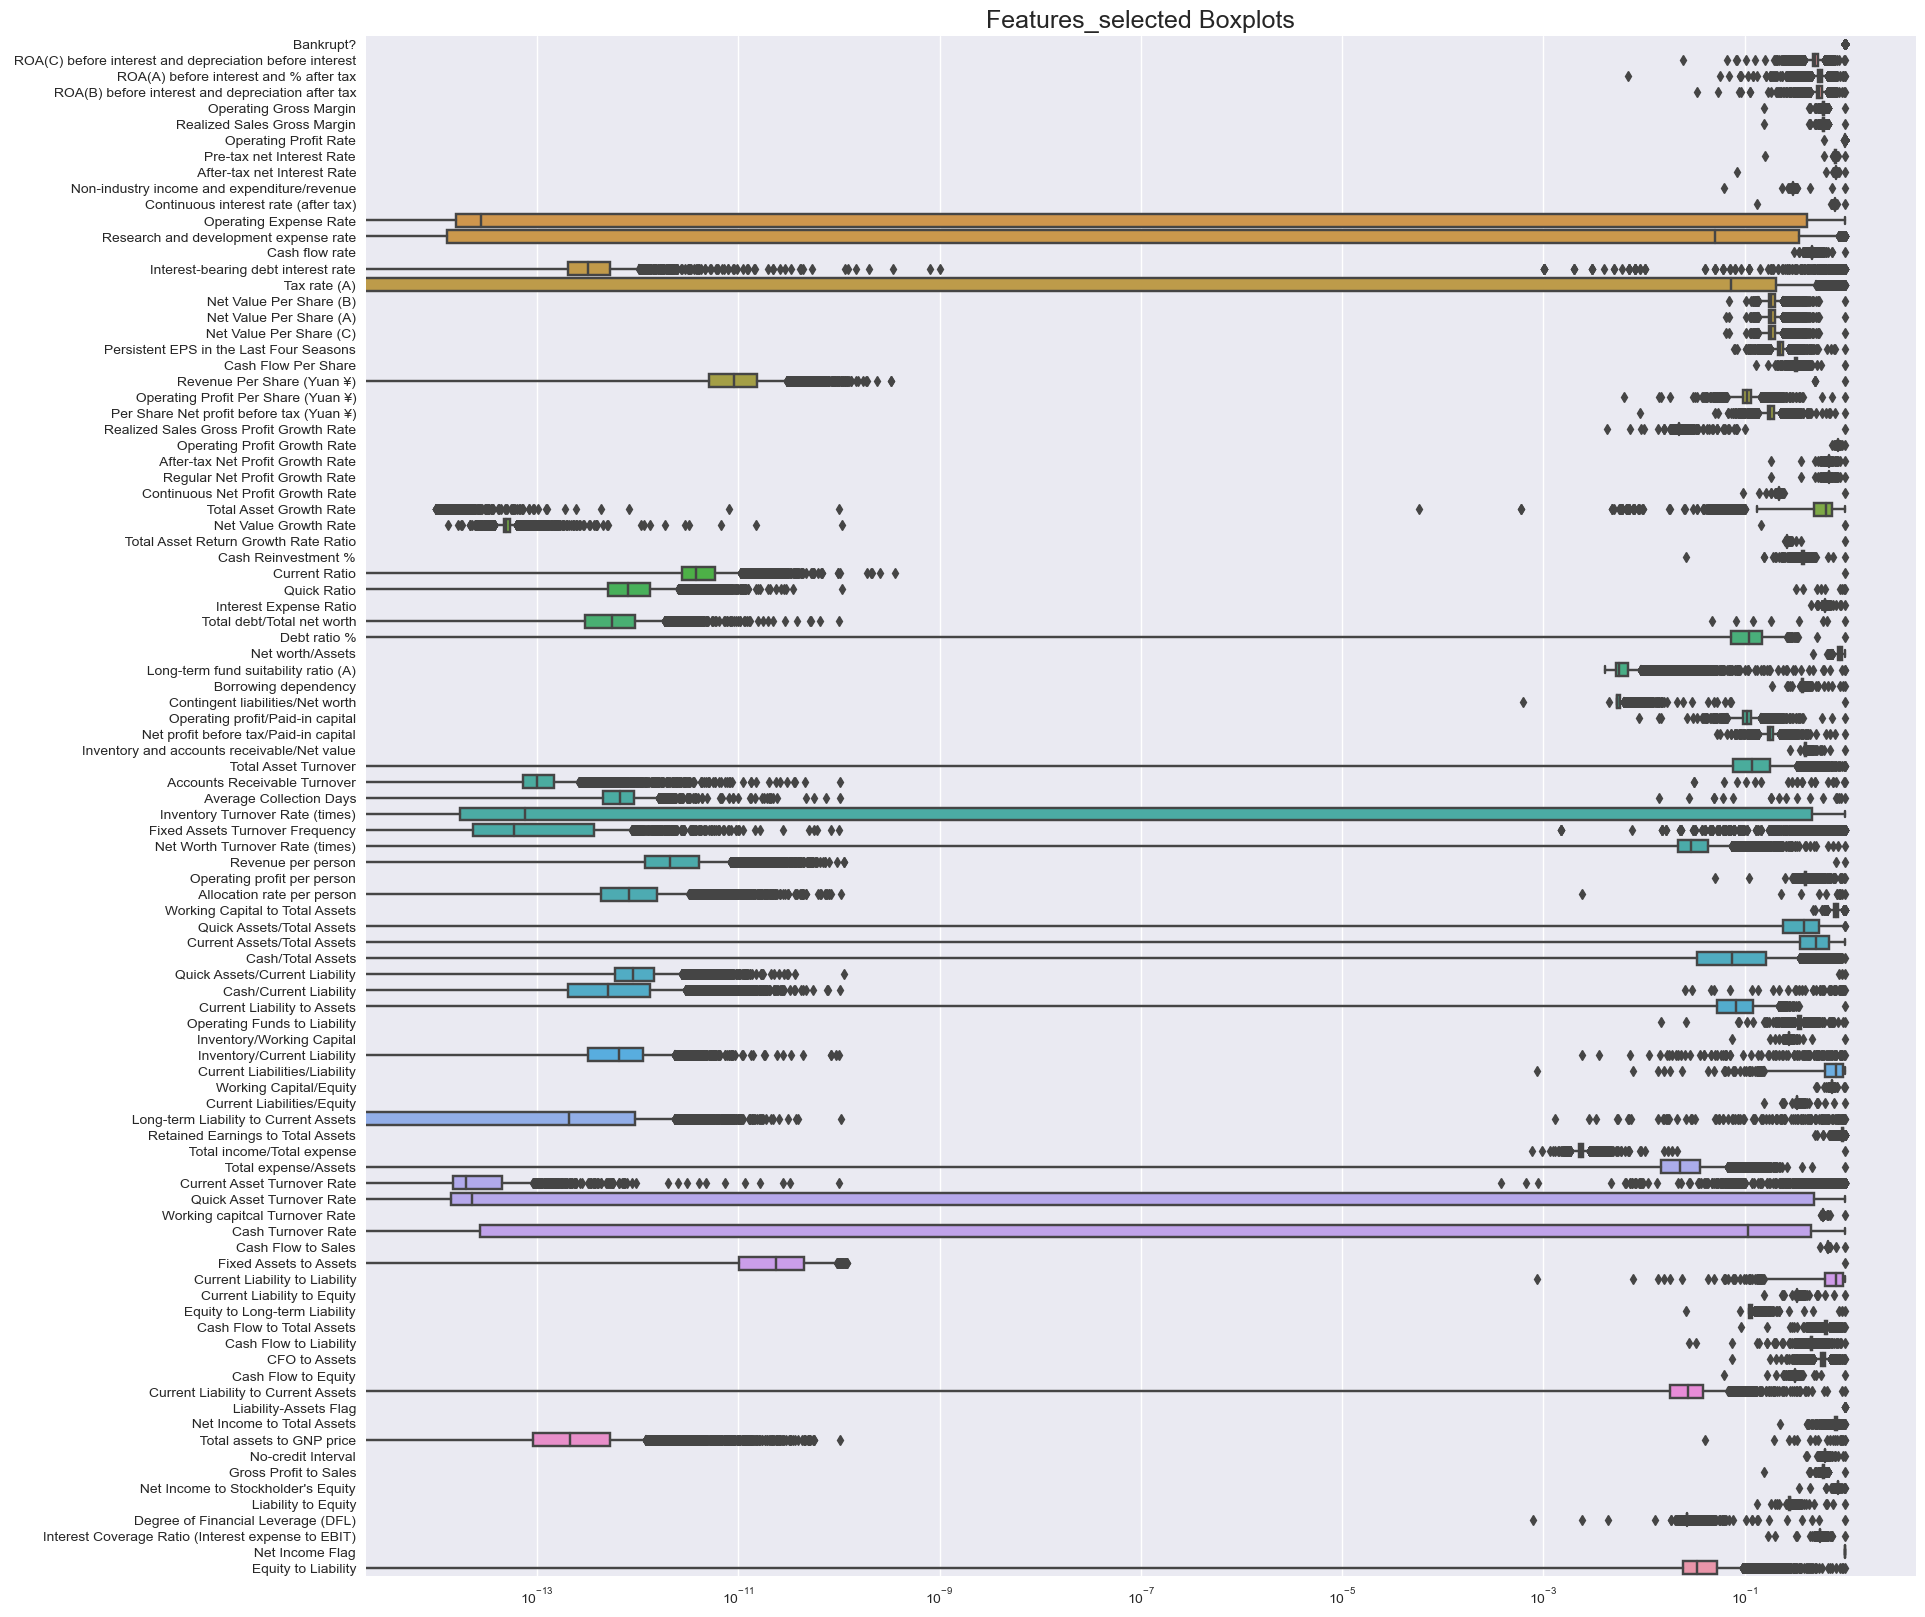

In [88]:
# Visulize outliers using boxplots
plt.figure(figsize = (20,20))
ax =sns.boxplot(data= df, orient="h")
ax.set_title('Features_selected Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

The dataset contains multiple outliers in several columns. It is beneficial to be aware of these outliers as they may impact the evaluation of the data and the accuracy of the predictions made by the model."

# Ubalanced data

In [89]:
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

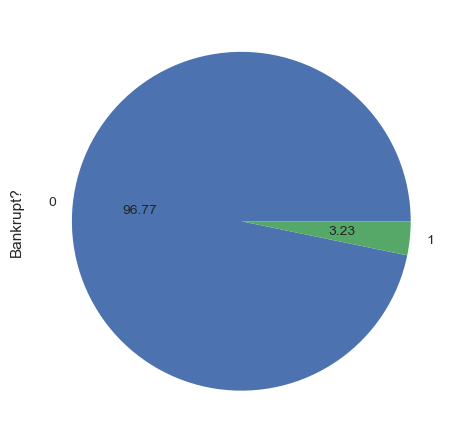

In [90]:
df['Bankrupt?'].value_counts().plot(kind='pie',autopct="%.2f")
plt.show()

In [91]:
x, y = df.drop('Bankrupt?',axis=1),df['Bankrupt?']
x.shape,y.shape

((6819, 95), (6819,))

In [92]:
smote = SMOTE(sampling_strategy='minority')
x,y = smote.fit_resample(x,y)

In [93]:
x.shape,y.shape

((13198, 95), (13198,))

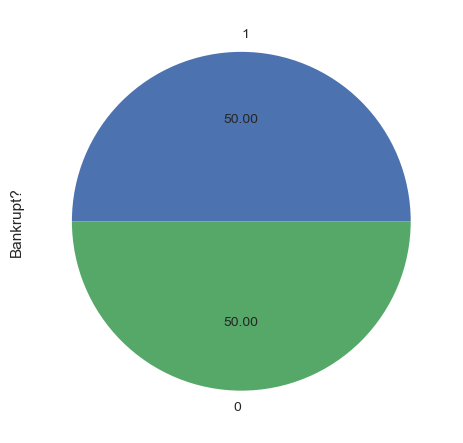

In [94]:
y.value_counts().plot(kind='pie',autopct="%.2f")
plt.show()

# Splitting and Training the data

In [95]:
# Split the data into training and validation sets
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((9238, 95), (3960, 95), (9238,), (3960,))

In [96]:
# Define the model
model = keras.Sequential([
    keras.layers.Dense(95, input_shape=(95,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')

# Set up early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)


The code above defines and compiles a neural network model using the Keras library. The model consists of a sequential model with two dense layers. The first layer has 95 neurons and expects input data with a shape of (95,). The activation function used is the rectified linear unit (ReLU) function. The second layer has 1 neuron and uses the sigmoid activation function, often used for binary classification tasks.

The model is then compiled using the compile method, which specifies the optimiser, metrics, and loss function to use. The optimiser parameter specifies the optimisation algorithm to use, which is the Adam optimiser. The metrics parameter sets the metrics to evaluate the model's performance. In this case, the metric is accuracy, the fraction of correct predictions made by the model. Finally, the loss parameter specifies the loss function to use, which is the binary cross-entropy loss function commonly used for binary classification tasks.

Finally, the code sets up early stopping using the EarlyStopping callback from the Keras.callbacks module. The monitor parameter specifies the metric to determine when to stop the training. The patience parameter specifies the number of epochs to wait before the training if the metric does not improve. In this case, the training will stop if the validation loss does not improve for 10 epochs.


In [97]:
# Fit the model
history = model.fit(x_train, y_train, epochs=200, callbacks=[early_stopping])

Epoch 1/200
289/289 [==============================] - 1s 1ms/step - loss: 0.5369 - accuracy: 0.7742
Epoch 2/200
289/289 [==============================] - 0s 1ms/step - loss: 0.3635 - accuracy: 0.8607
Epoch 3/200
289/289 [==============================] - 0s 1ms/step - loss: 0.3175 - accuracy: 0.8769
Epoch 4/200
289/289 [==============================] - 0s 1ms/step - loss: 0.2960 - accuracy: 0.8837
Epoch 5/200
289/289 [==============================] - 0s 1ms/step - loss: 0.2877 - accuracy: 0.8841
Epoch 6/200
289/289 [==============================] - 0s 1ms/step - loss: 0.2775 - accuracy: 0.8892
Epoch 7/200
289/289 [==============================] - 0s 1ms/step - loss: 0.2710 - accuracy: 0.8920
Epoch 8/200
289/289 [==============================] - 0s 1ms/step - loss: 0.2659 - accuracy: 0.8929
Epoch 9/200
289/289 [==============================] - 0s 1ms/step - loss: 0.2627 - accuracy: 0.8945
Epoch 10/200
289/289 [==============================] - 0s 1ms/step - loss: 0.2590 - accura

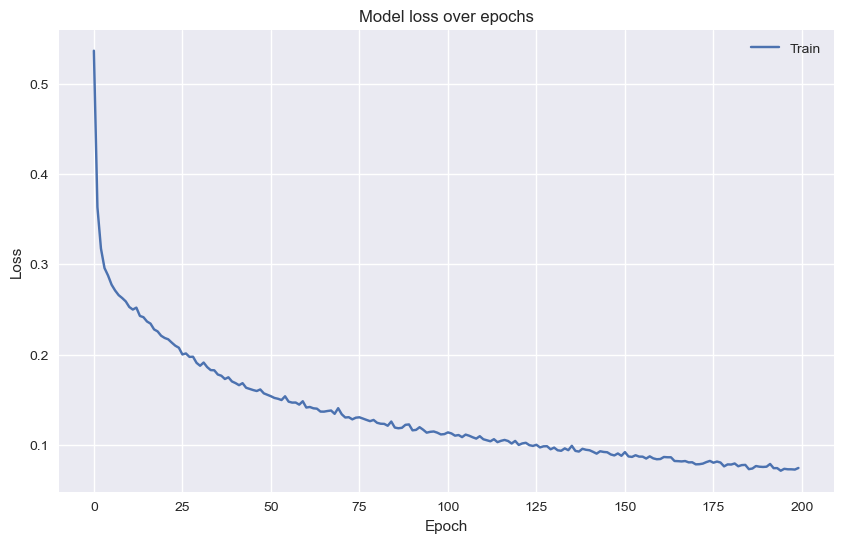

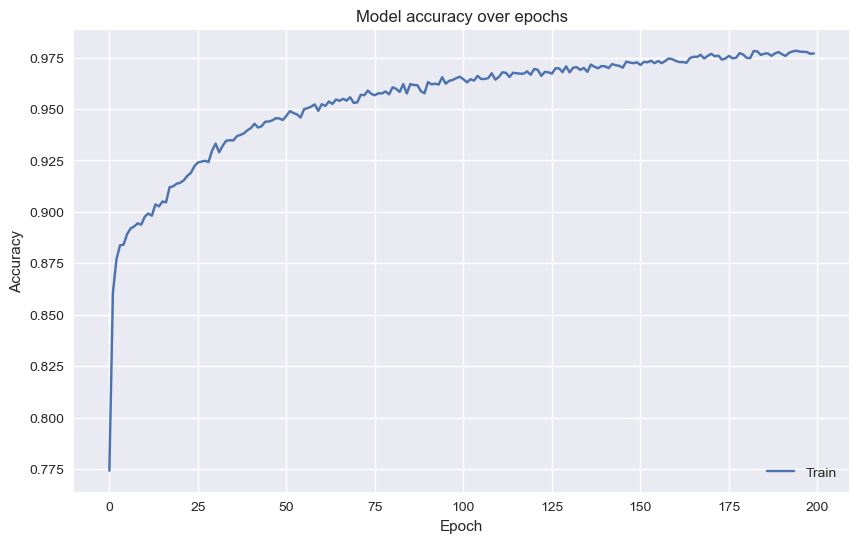

In [98]:
# Plot the training and validation loss/accuracy curves
plt.style.use('seaborn')
plt.figure(figsize=(10, 6))


plt.plot(history.history['loss'])
plt.title('Model loss over epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))

plt.plot(history.history['accuracy'])
plt.title('Model accuracy over epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()


These results show the progress of training a neural network using the Keras library in Python. The model is being trained on a dataset and is being evaluated using the loss and accuracy metrics.

The output shows the training process’s progress over several epochs. Each epoch represents a pass through the entire training dataset. The model is updated based on the results of each epoch.

The loss value is the loss function being minimised during training. It represents the error of the model on the training data. A lower value indicates that the model is performing better.

The accuracy value is the accuracy of the model on the training data. It is the fraction of correctly classified examples in the training set. A higher value indicates that the model is performing better.

The model converges as the loss and accuracy values decrease, and the model is not improving significantly after a certain number of epochs. Therefore, the training process is interrupted by the early stopping callback when the validation loss does not improve for a certain number of epochs.


In [99]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test loss: {test_loss:.4f} ')

124/124 [==============================] - 0s 1ms/step - loss: 0.0957 - accuracy: 0.9720
Test loss: 0.0957 


Overall, these results indicate that the model performs well on the test set, with a low loss and a high accuracy. Furthermore, the model may be considered to be a good fit for the data, as it is able to generalise well to unseen data.

In [104]:
def predict(model,x):
    # Make predictions on the input data using the model
    pred  = model.predict(x)
    
    # Threshold the predictions using a threshold of 0.5
    pred[pred >= 0.5] = 1
    pred[pred < 0.5] = 0
    return pred

def predict_graph(y_true,y_pred,title):
    # Generate a confusion matrix using the true and predicted labels
    cm = confusion_matrix(y_true,y_pred)
    
    # Plot the confusion matrix using a heatmap
    plt.figure(figsize=(7,7))
    sns.heatmap(cm,annot=True,fmt='g',cmap="YlGnBu",
                xticklabels=['No Bankruptcy','Bankruptcy'],yticklabels=['No Bankruptcy','Bankruptcy'])
    plt.title(title)
    plt.show()
    
    # Print the classification report
    print("\n")
    print("Classification Report:")
    print(classification_report(y_true,y_pred))


124/124 [==============================] - 0s 1ms/step


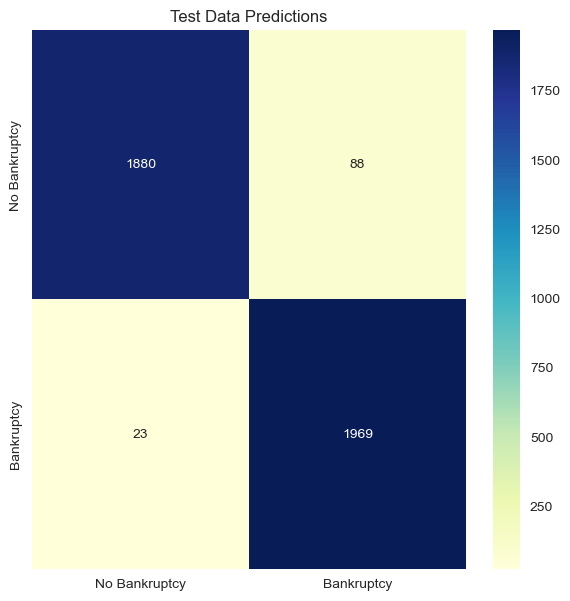



Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1968
           1       0.96      0.99      0.97      1992

    accuracy                           0.97      3960
   macro avg       0.97      0.97      0.97      3960
weighted avg       0.97      0.97      0.97      3960



In [105]:
y_test_pred = predict(model,x_test)
predict_graph(y_test,y_test_pred,'Test Data Predictions')

289/289 [==============================] - 0s 879us/step


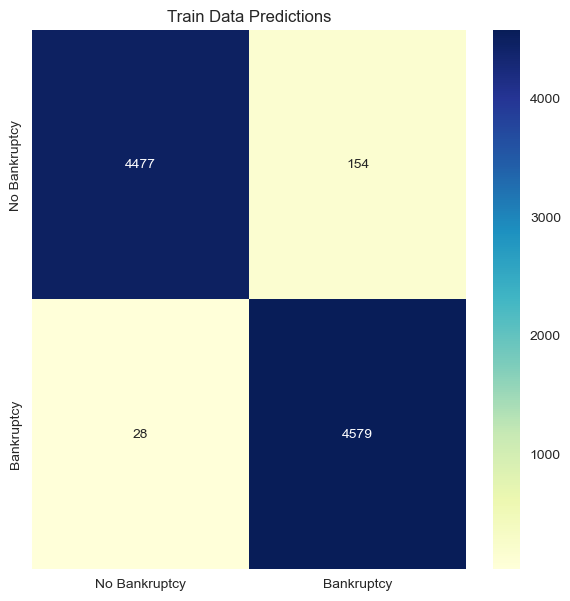



Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4631
           1       0.97      0.99      0.98      4607

    accuracy                           0.98      9238
   macro avg       0.98      0.98      0.98      9238
weighted avg       0.98      0.98      0.98      9238



In [106]:
y_train_pred = predict(model,x_train)
predict_graph(y_train,y_train_pred,'Train Data Predictions')

The confusion matrices show the number of correct and incorrect predictions made by the model for each class. The classification reports show various evaluation metrics for each class's precision, recall, and F1 score. These evaluation metrics can be used to assess the model’s performance on the input data.

These results show the evaluation of the performance of a model on a test dataset. The evaluation is based on several classification metrics, including precision, recall, and F1 score.

Precision is the fraction of true positives among the predicted positive examples. It measures the model's ability to predict positive examples correctly. A high precision value indicates that the model is reliable when it predicts positive examples.

Recall is the fraction of true positives among all positive examples. It is a measure of the model's ability to identify positive examples correctly. A high recall value indicates that the model can identify most of the positive examples in the dataset correctly.

The F1 score is the harmonic mean of precision and recall. It is a balance between the two, considering the model’s precision and recall. A high F1 score indicates that the model has a good balance between precision and recall.

In this case, the model performs well on the test dataset, with high precision, recall, and F1 scores for both classes. In addition, the model can correctly classify most of the examples in the test dataset, with high overall accuracy.

## Refrence

Houcembenmansour (2021) Bankruptcy perdiction ~ 99.67% f1_score, Kaggle. Kaggle. Available at: https://www.kaggle.com/code/houcembenmansour/bankruptcy-perdiction-99-67-f1-score#F1_score. 

## Dataset Used - https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction